In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
import numpy as np
import numpy as np
import tensorflow as tf
import tkinter as tk
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [ ]:
# Загрузка данных
(train_images, train_labels), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Преобразование изображений в формат с 1 каналом (черно-белые)
train_images = train_images.reshape((-1, 28, 28, 1)).astype("float32") / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)).astype("float32") / 255.0

# Преобразование меток в one-hot кодировку
train_labels = keras.utils.to_categorical(train_labels, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Создание модели с несколькими слоями
def create_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Flatten(),
        
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),  # Dropout для предотвращения переобучения
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Кросс-валидация
kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []

for train_index, val_index in kf.split(train_images):
    X_train, X_val = train_images[train_index], train_images[val_index]
    y_train, y_val = train_labels[train_index], train_labels[val_index]
    
    # Создание модели
    model = create_model()
    
    # Обучение модели
    model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val), verbose=0)
    
    # Оценка на валидационной выборке
    val_predictions = model.predict(X_val)
    val_predicted_labels = np.argmax(val_predictions, axis=1)
    val_true_labels = np.argmax(y_val, axis=1)
    
    val_accuracy = accuracy_score(val_true_labels, val_predicted_labels)
    accuracies.append(val_accuracy)

# Средняя точность по всем фолдам
print("Cross-Validation Accuracy (mean):", np.mean(accuracies))

# Обучение финальной модели на всех данных
final_model = create_model()
final_model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Оценка модели на тестовых данных
test_predictions = final_model.predict(x_test)
test_predicted_labels = np.argmax(test_predictions, axis=1)
test_true_labels = np.argmax(y_test, axis=1)

test_accuracy = accuracy_score(test_true_labels, test_predicted_labels)
print("Test Accuracy:", test_accuracy)


c:\Users\Alexey\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


c:\Users\Alexey\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


c:\Users\Alexey\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


c:\Users\Alexey\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


c:\Users\Alexey\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Cross-Validation Accuracy (mean): 0.9844000000000002
Epoch 1/5


c:\Users\Alexey\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 54ms/step - accuracy: 0.8672 - loss: 0.4534 - val_accuracy: 0.9731 - val_loss: 0.0875
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 56ms/step - accuracy: 0.9754 - loss: 0.0830 - val_accuracy: 0.9822 - val_loss: 0.0604
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 52ms/step - accuracy: 0.9841 - loss: 0.0560 - val_accuracy: 0.9850 - val_loss: 0.0513
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 51ms/step - accuracy: 0.9852 - loss: 0.0470 - val_accuracy: 0.9847 - val_loss: 0.0578
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.9879 - loss: 0.0370 - val_accuracy: 0.9883 - val_loss: 0.0429
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Test Accuracy: 0.9883


In [32]:
model.save("mnist_model.h5")  # Сохранение модели

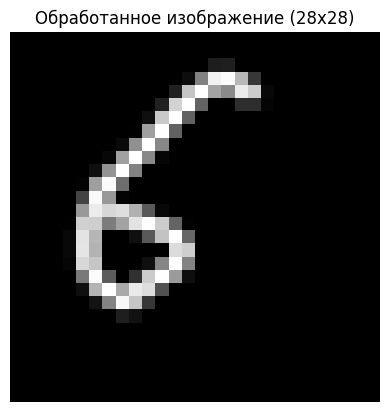

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


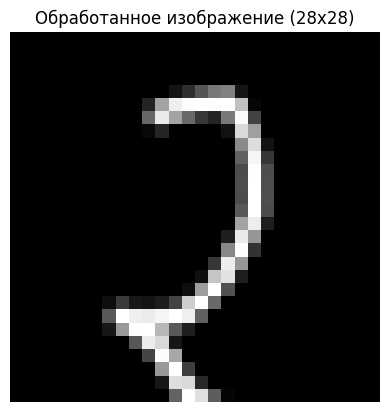

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


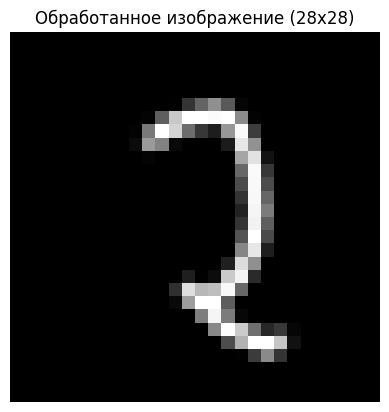

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


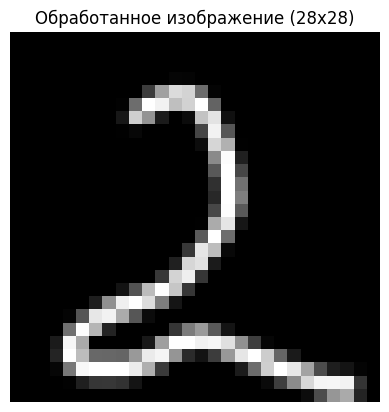

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


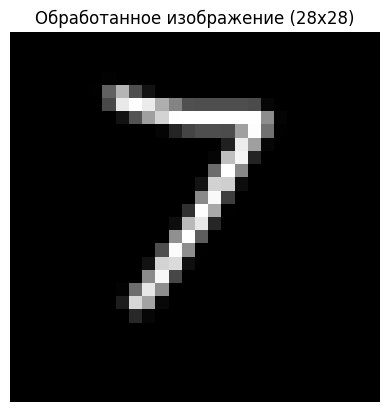

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


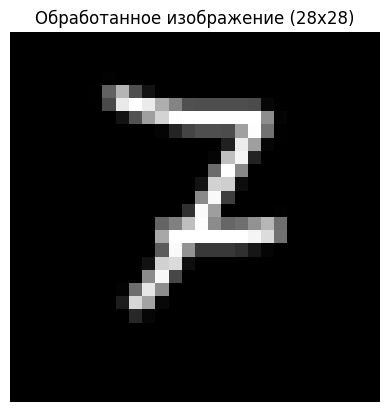

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


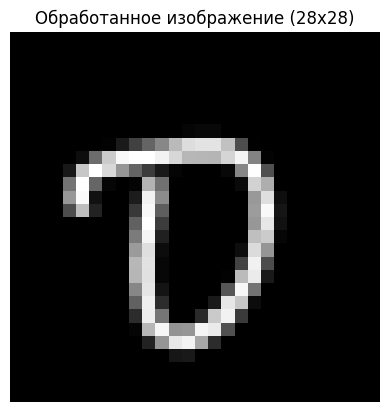

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


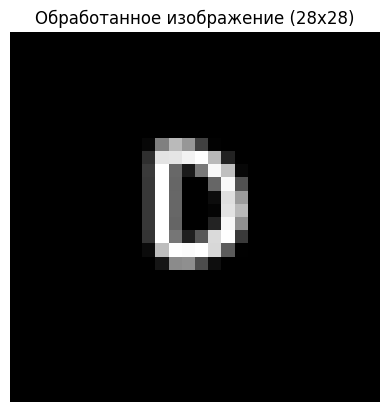

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


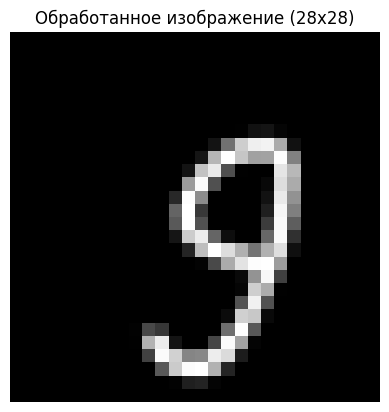

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


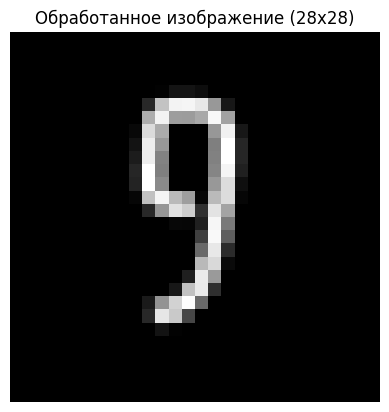

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


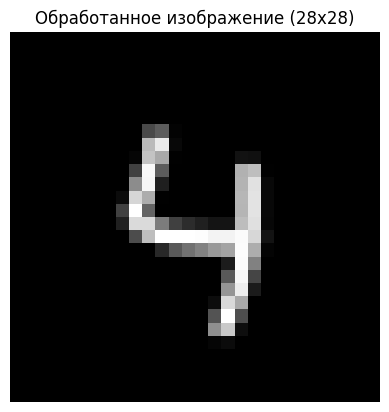

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


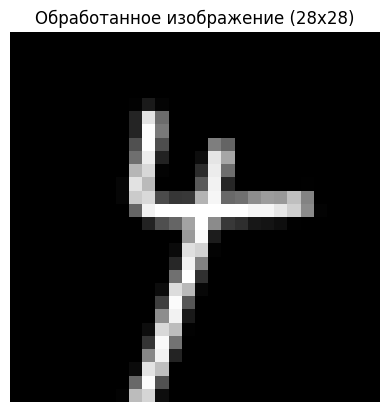

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


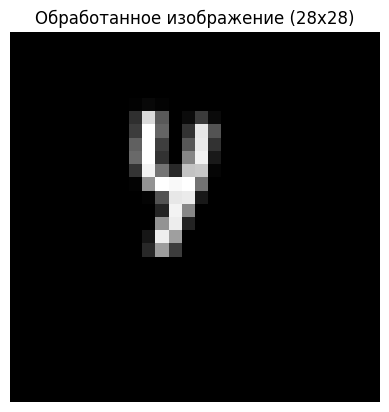

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


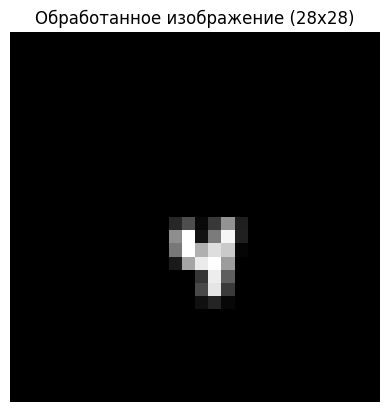

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


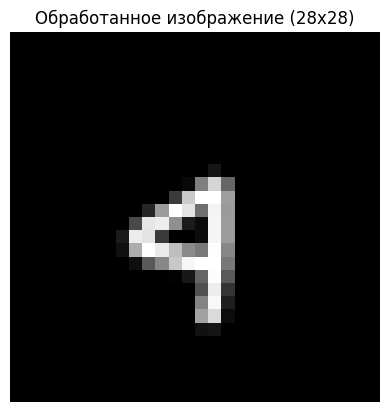

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


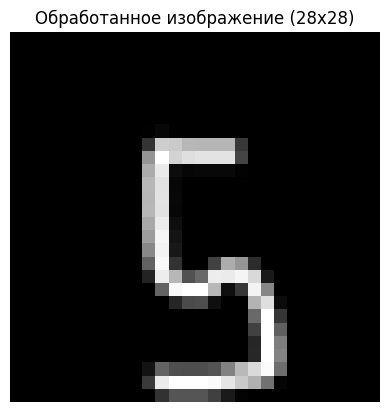

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


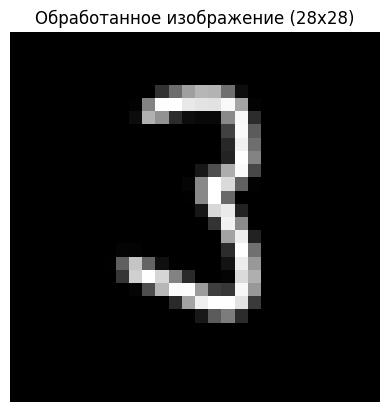

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [33]:



model = tf.keras.models.load_model("mnist_model.h5")  

# Функция обработки изображения и предсказания цифры
def predict_digit(img):
    img = img.convert("L")  
    img = img.resize((28, 28))  
    img_array = np.array(img)

    # Нормализация (0-1 вместо 0-255)
    img_array = img_array.astype(np.float32) / 255.0

    # Добавляем оси: (28, 28) -> (1, 28, 28, 1)
    img_array = img_array.reshape(1, 28, 28, 1)

    # Визуализация обработанного изображения
    plt.imshow(img_array.squeeze(), cmap="gray")
    plt.title("Обработанное изображение (28x28)")
    plt.axis("off")
    plt.show()

    # Предсказание модели
    probabilities = model.predict(img_array)[0] 
    prediction = np.argmax(probabilities)  # Получаем индекс класса с наибольшей вероятностью

    # Выводим результат в GUI
    label.config(text=f"Prediction: {prediction}", font=("Arial", 20))
    prob_text = "\n".join([f"{i}: {prob*100:.2f}%" for i, prob in enumerate(probabilities)])
    label_probs.config(text=prob_text, font=("Arial", 14), justify="left")

# Функции для рисования
def start_draw(event):
    global last_x, last_y
    last_x, last_y = event.x, event.y

def draw(event):
    global last_x, last_y
    canvas.create_line(last_x, last_y, event.x, event.y, width=16, fill="white", capstyle=tk.ROUND)
    draw_img.line([last_x, last_y, event.x, event.y], fill="white", width=16)
    last_x, last_y = event.x, event.y

def clear_canvas():
    canvas.delete("all")
    draw_img.rectangle((0, 0, 280, 280), fill="black")
    label_probs.config(text="\n".join([f"{i}: 0.0%" for i in range(10)]))
    label.config(text="Prediction: ")

def recognize():
    predict_digit(img)

# Создание GUI
root = tk.Tk()
root.title("Распознавание рукописных цифр")

frame = tk.Frame(root)
frame.pack()

canvas = tk.Canvas(frame, width=300, height=300, bg="black")  # Черный фон
canvas.grid(row=0, column=0, padx=10)

img = Image.new("L", (280, 280), "black")  # Черное изображение для рисования
draw_img = ImageDraw.Draw(img)

canvas.bind("<Button-1>", start_draw)
canvas.bind("<B1-Motion>", draw)

btn_clear = tk.Button(frame, text="Очистить", command=clear_canvas)
btn_clear.grid(row=1, column=0, pady=5)

btn_recognize = tk.Button(frame, text="Распознать", command=recognize)
btn_recognize.grid(row=2, column=0, pady=5)

label_probs = tk.Label(frame, text="\n".join([f"{i}: 0.0%" for i in range(10)]), font=("Arial", 14), justify="left")
label_probs.grid(row=0, column=1, padx=20, sticky="n")

label = tk.Label(frame, text="Prediction: ", font=("Arial", 20))
label.grid(row=1, column=1, sticky="s")

root.mainloop()
